# 회귀 소개

회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭<br>
예를 들어 아파트의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지를 모델링하고 예측<br>
선형회귀식을 예로 들면, Y는 종속변수 즉 아파트 가격을 뜻하고 방 개수, 방 크기, 주변 학군 등은 X1,X2,X3.. 는 독립변수를 의미 <br>
그리고 W1, W2, ,,, Wn은 이 독립변수의 값에 영향을 미치는 회귀 계수

머신러닝 관점에서 보면 독립변수는 피처에 해당되며, 종속변수는 결정 값<br>
-> 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

회귀는 회귀계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있음<br>
회귀에서 중요한 것은 바로 회귀계수 -> 회귀 계수가 선형이냐 아니냐에 따라 선형회귀와 비선형 회귀로 나눌 수 있음<br>
그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉨



지도학습은 두 가지 유형 -> 바로 분류와 회귀<br>
이 두 가지 기법의 가장 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값 

여러 가지 회귀 중에서 선형회귀가 가장 많이 사용됨. <br>
-> 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식<br>
선형회귀모델은 규제 방법에 따라 다시 별도의 유형으로 나뉠 수 있음 

## 비용함수 

RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w변수(회귀계수)가 중심 변수임을 인지하는 것이 중요 <br>
(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주)<br>
-> RSS를 최소로 하는 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반의 핵심 사항 <br>
; 머신러닝회귀 알고리즘은 데이터를 계속 학습하면서 이 비용함수가 반환하는 값 (즉 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것.


# 경사하강법

어떻게 비용함수가 최소가 되는 w 파라미터를 구할 수 있을까?

경사하강법은 사실 '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나<br>
경사하강법의 사전적 의미인 '점진적인 하강'이라는 뜻에서도 알 수 있듯이, '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 w 파라미터를 구하는 방식

경사하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감. <br>
최초 오류값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 W값을 계속 업데이트 해나감. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W값을 최적 파라미터로 반환 

### 경사하강법을 파이썬 코드로 구현  예) y=4x+6

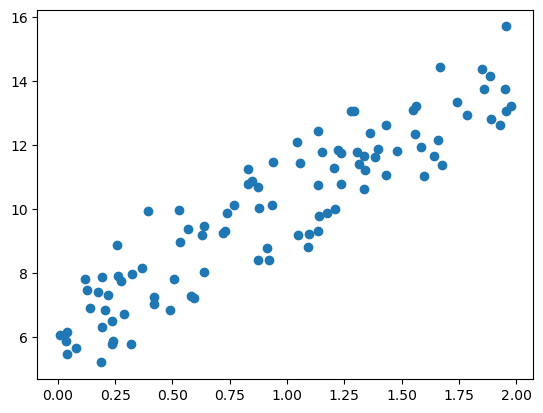

In [4]:
np.random.seed(0)

#y=4x+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦

X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [5]:
#비용 함수를 정의

def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [14]:
#w1과 w0을 업데이트 할 w1_update, wo_update를 반환.

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    #먼저 w1_update, wo_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X,w1.T)+w0
    diff = y-y_pred
    
    #wo_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    #w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update , w0_update

In [17]:
#get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1 w0을 업데이트 하는 함수인 gradient_descent_steps()gkatnfmf todtjd

#입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X,y, iters=10000):
    #wo,w1 모두 0으로 초기화
    w0= np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1,w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1, w0

In [19]:
w1, w0 = gradient_descent_steps(X,y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X+w0
print("Gradient Descent Total Cost : {0:.4f}".format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


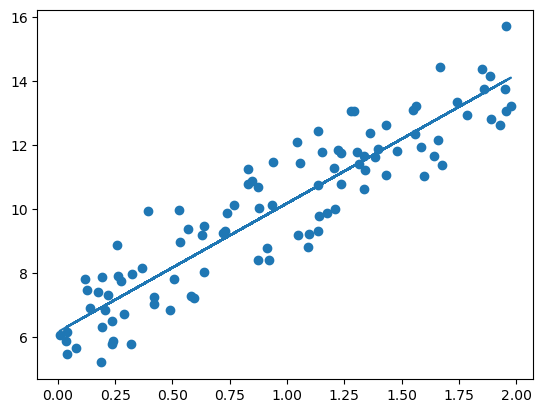

In [20]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [25]:
#(미니배치) 확률적 경사 하강법 ; 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1과 w0 update

def stochastic_gradient_descent_steps(X,y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    for ind in range(iters):
        np.random.seed(ind)
        #전체 X, y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_x, samole_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        #랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update , w0_update = get_weight_updates(w1,w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0=w0-w0_update
    return w1,w0

In [26]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=10000)
print("w1:",round(w1[0,0],3),"w0:", round(w0[0,0],3))
y_pred = w1[0,0]*X+w0
print("Stochastic Gradient Descent Total Cost:{0:.4f}".format(get_cost(y,y_pred)))

w1: 3.988 w0: 6.244
Stochastic Gradient Descent Total Cost:0.9942


# 사이킷런 LinearRegression

### LinearRegression 클래스 - Ordinary Least Squares
: LinearRegression 클래스는 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스<br>
: fit()메서드로 X,y 배열을 입력 받으면 회귀계수인 W를 coef_ 속성에 저장 <br>
: OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음 <br>
= 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐 <br>
= "다중공선성" 문제 <br>
-> 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용<br>
또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있음 

### 회귀 평가 지표 
- MAE : 실제 값과 예측값의 차이를 절댓값으로 변환해 평균 <br>
- MSE : 실제 값과 예측값의 차이를 제곱해 평균<br>
- RMSE : MSE는 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE <br>
- R-squared : 분산 기반으로 예측 성능 평가<br>

### 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score / scoring 파라미터 적용값
- MAE -> metrics.mean_absolute_error -> "neg_mean_absolute_error"<br>
- MSE -> metrics.mean_squared_error -> "neg_mean_squared_error"<br>
- MAE -> metrics.r2_score -> "r2"<br>

: 위의 두가지 방법처럼 scoring 함수에 음수값을 반환하는 이유는 사이킷런의 scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문.<br>
-> 그래서 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는의미이므로 이를 사이킷런의 scoring 함수에 일반적으로 반영하려면 보정이 필요 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
bostonDF = pd.DataFrame(data, columns=["CRIM","ZN","INDUS","CHAS", "NOX","RM","AGE", "DIS","RAD","TAX","PTRATIO","B" ," LSTAT" ])

In [29]:
bostonDF["PRICE"] = target

In [30]:
print("Boston 데이터 세트 크기:", bostonDF.shape)

Boston 데이터 세트 크기: (506, 14)


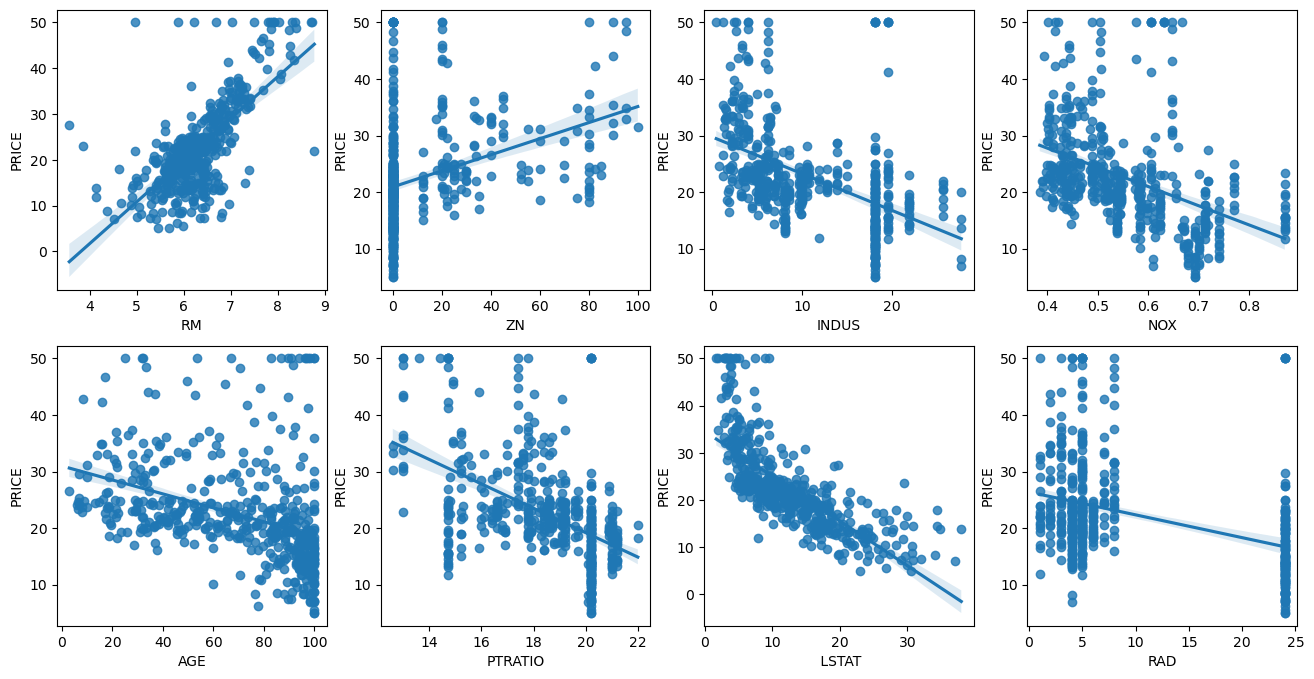

In [32]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ["RM", "ZN", "INDUS","NOX","AGE","PTRATIO"," LSTAT","RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE:{0:.3f}, RMSE:{1:.3f}".format(mse,rmse))
print("Variance score {0:.3f}".format(r2_score(y_test, y_preds)))

MSE:17.297, RMSE:4.159
Variance score 0.757


In [34]:
print("절편 값:", lr.intercept_)
print("회귀 계수 값:",np.round(lr.coef_,1))

절편 값: 40.99559517216412
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [35]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
 LSTAT     -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [36]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)
lr = LinearRegression()

#cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


# 다항 회귀

: 한 가지 주의할 것은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀라는 점 <br>
: 회귀에서 선형 회귀 / 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관 <br>
: 사이킷런은 다항 회귀를 위한 클래스를 명시적을 제공하지 않음. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현 

In [37]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피처:\n",X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처:\n",poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [46]:
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 feature: \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값:\n",y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [47]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("3차 다항식 계수 피처:\n",poly_ftr)

#Linear Regression에 3차 다항식 계수. feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print("Polynomial 회귀 계수\n", np.round(model.coef_,2))
print("Polynomial 회귀 shape:", model.coef_.shape)

3차 다항식 계수 피처:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

In [49]:
#pipeline 객체로 streamline하게 polynomial feature 변환과 linear regression을 연결
model = Pipeline([("poly", PolynomialFeatures(degree=3)),("linear",LinearRegression())])

In [50]:
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print("Polynomial 회귀 계수\n", np.round(model.named_steps["linear"].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [51]:
#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X= np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X)+np.random.randn(n_samples)*0.1


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232044 입니다

Degree 15 회귀계수는 [-2.98293000e+03  1.03899490e+05 -1.87416410e+06  2.03716626e+07
 -1.44873630e+08  7.09317305e+08 -2.47066542e+09  6.24563114e+09
 -1.15676921e+10  1.56895529e+10 -1.54006639e+10  1.06457712e+10
 -4.91379699e+09  1.35920272e+09 -1.70381606e+08] 입니다.
Degree 15 MSE는 180216386.19902942 입니다


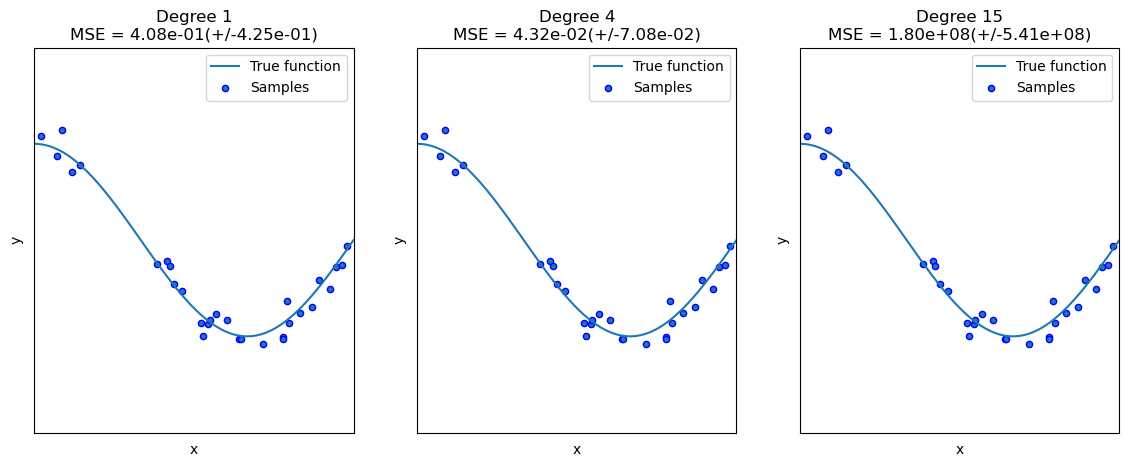

In [58]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

#다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax, xticks=(),yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),
                        ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    scores = cross_val_score(pipeline, X.reshape(-1,1),y, scoring="neg_mean_squared_error",cv=10)
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print("\nDegree {0} 회귀계수는 {1} 입니다.".format(degrees[i],np.round(coefficients,2)))
    print("Degree {0} MSE는 {1} 입니다".format(degrees[i],-1*np.mean(scores)))
    
    X_test = np.linspace(0,1,100)
    plt.plot(X_test, true_fun(X_test),"-", label="True function")
    plt.scatter(X,y, edgecolor="b",s=20, label="Samples")
    
    plt.xlabel("x") ; plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))

# 편향-분산 트레이드 오프

편향-분산 트레이드 오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나 <br>
ex. 앞의 degree=1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있음 = 고편향성 <br>
반대로 degree=15와 같은 모델은 학습데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성 = 고분산성 <br>

저편향/고분산<br>
: 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포돼 있음<br>
고편향/저분산<br>
: 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중돼 있음

일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음<br>
즉 편향이 높으면 분산은 낮아지고 (과소적합)<br>
반대로 분산이 높으면 편향이 낮아짐(과적합)<br>
=> 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 골디락스 지점을 통과하면서 분산은 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측성능이 다시 저하 